# Exploratory Data Analysis (EDA) with Pandas in Banking

The purpose of this project is to master the exploratory data analysis (EDA) in banking with Pandas framework.

Goals of the Project:

Explore a banking dataset with Pandas framework.
Build pivot tables.
Visualize the dataset with various plot types.

Importing the libraries necessary for this project. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots.

In [ ]:
# Citi Bank

In [ ]:
banking - marketing team
data analyst at Citi (marketing)

25M --> customers
marketing campaign --> who you should target for this campaign?

In [ ]:
CITI Bank

In [ ]:
Axis, Citi, ICICI, HDFC, SBI, Kotak, , Insulnd, Federal Bank,Canara bank,DBS,IDFC, PNB, Barclays, BOB,
BNB Paribas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset exploration
In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [2]:
#df = pd.read_csv(r'C:\Users\MJ\Documents\bank-additional.csv')

In [3]:
df = pd.read_csv(r'bank-additional.csv',sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
pd.set_option('display.max_columns', 25)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
BUSINESS TRAVEL CREDIT CARD --> 
GENDER, INCOME, AGE

In [ ]:
#missed a payment deadline previousl
# no of other campaigns 
#credit card A

# Let's look at the dataset size, feature names and their types

In [7]:
df.shape

(4119, 21)

The dataset contains 4119 objects (rows), for each of which 21 features are set (columns), including 1 target feature (y).

Attributing information
Output the column (feature) names:

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

* age - client's age in years (numeric)
* job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
* marital - marital status (categorical: divorced, married, single, unknown)
* education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
* default - has credit in default? (categorical: no, yes, unknown)
* housing - has housing loan? (categorical: no, yes, unknown)
* loan - has personal loan? (categorical: no, yes, unknown)
* contact - contact communication type (categorical: cellular, telephone)
* month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
* day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
* duration - last contact duration, in seconds (numeric).
* campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
* pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
* previous - number of contacts performed for this client before this campaign (numeric)
* poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
* emp.var.rate - employment variation rate, quarterly indicator (numeric)
* cons.price.idx - consumer price index, monthly indicator (numeric)
* cons.conf.idx - consumer confidence index, monthly indicator (numeric)
* euribor3m - euribor 3 month rate, daily indicator (numeric)
* nr.employed - number of employees, quarterly indicator (numeric)
* Output feature (desired target): y - has the client taken a very similar credit card before? (binary: yes,no)
To see the general information on all the DataFrame features (columns), we use the info method:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [10]:
# C-id,age, salary, country
# 1, 20, 50K, IND 
# 1, 20, 50K, IND 

In [ ]:
age, salary, country
20, 50K, IND 
20, 50K, IND 

In [ ]:
#Shape of the data
#Check what all columns are existing
#Check data types of columns
#Missing values check
#Duplicated value
#Outliers

#Data Analysis --> EDA -->
# Univariate Analysis
# Bivariate Analysis
# Multivariate Analysis

In [ ]:
#Missing values check

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
df["y"].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [16]:
df["y"].value_counts(normalize = True)*100

no     89.05074
yes    10.94926
Name: y, dtype: float64

In [ ]:
#90% of customers are not purchasing the credit card

In [24]:
df['y'].value_counts()
#reality ---> susbcribers or non subbscribers ---> who will be more?

no     3668
yes     451
Name: y, dtype: int64

# Validate Hypothesis

#### Users who purchased credit card were older in age compared to users who didnt purchase

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


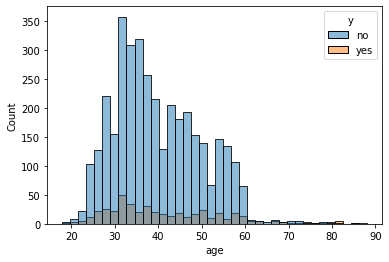

In [19]:
sns.histplot(data = df, x= 'age',hue="y")
plt.show()

In [ ]:
#Older people -> age

In [23]:
older_group = df[df['age']>=50]
younger_group = df[df['age']<50]

In [ ]:
CR = # of customers who purchased/# of customers were targeted

In [ ]:
#CR in older group = # of customers who purchased in older group*100/# of customers were targeted in the older group

In [29]:
older_group['y'].value_counts(normalize= True)*100 #CR = 15.38

no     84.615385
yes    15.384615
Name: y, dtype: float64

In [30]:
younger_group['y'].value_counts(normalize = True)*100 #CR = 9.82

no     90.17341
yes     9.82659
Name: y, dtype: float64

In [ ]:
#CR of older group = 15.38, CR of younger group = 9.82 --> finding
#Older group(age>=50) seem to have a higher CR commpared the younger group(age<50) --> insight
#As age increases, income increases an thats why a higher proportion of older group is able to 
#afford the premium Credit Cards ---> #logical reason

In [ ]:
#1M customers  --> OLDER GROUP CR


100 customers --> OLder GROUP CR

In [ ]:
#Hypothesis Testing --> sample
--> Age has an impact on CR

In [ ]:
sample, enitre data?

In [ ]:
4110 --> entire population

In [ ]:
Null Ho: CR of older and young group are same
Alt Ha: CR of older group > CR of young group

In [ ]:
older -- 1000, 99
younger - 100, 98

In [12]:
df[['age','y']].head()

,age,y
0,30,no
1,39,no
2,25,no
3,38,no
4,47,no


In [13]:
subs = df[df['y'] =='yes']
non_subs = df[df['y'] =='no']

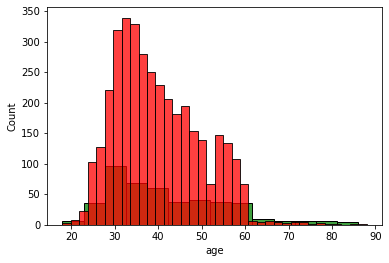

In [14]:
sns.histplot(subs['age'],color = 'green')
sns.histplot(non_subs['age'],color = 'red' )
plt.show()

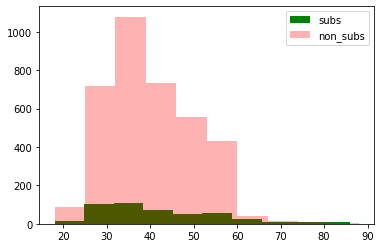

In [15]:
plt.hist(subs['age'],color = 'green',label ='subs')
plt.hist(non_subs['age'],color = 'red',alpha = 0.3,label='non_subs' )
plt.legend()
plt.show()

In [ ]:
rows     Yes No
20-35     8  120   
35-60
60+

In [ ]:
subcribtion across ages

In [ ]:
>=50--> older --G1
<50 --> younger -- G2

In [6]:
df.age

0       30
1       39
2       25
3       38
4       47
        ..
4114    30
4115    39
4116    27
4117    58
4118    34
Name: age, Length: 4119, dtype: int64

In [16]:
old = df[df['age']>=50]
young = df[df['age']<50]

In [17]:
old['y'].value_counts(normalize = True)*100
#in old group of customers, 128 people subscribe
#in old group of customers, 15% people subscribe

no     84.615385
yes    15.384615
Name: y, dtype: float64

In [18]:
young['y'].value_counts(normalize = True)*100
#in young group, 323 people susbcribe
#in young group of customers, 9% people subscribe

no     90.17341
yes     9.82659
Name: y, dtype: float64

In [ ]:
z proportion test

In [ ]:
old subs > young subs rate --> significant


The old group is having a better subscription rate indicating they are better suited to be the target audience

This aligns with our initial hypothesis

In [ ]:
10% of the original data --> what do you have ?
sample data 

In [ ]:
Inferential Statistics -> Hypothesis Testing: 
sample data --> 

In [ ]:
Attribute 1: Age : prefer older 

In [ ]:
10% of original data - 4k rows


In [13]:
old.shape

(832, 21)

In [14]:
young.shape

(3287, 21)

In [20]:
old_subscribers = len(old[old['y']=='yes'])

In [24]:
len(old[old['y']=='yes'])

128

In [22]:
# of users who subscribed in old group/# of users in older group
old_subscribers*100/len(old)

15.384615384615385

In [25]:
young_subscribers = len(young[young['y']=='yes'])
young_subscribers*100/len(young)

9.826589595375722

In [ ]:
age has an impact on th

In [ ]:
do you believe what you see in data  - old people
or 
do you believe what you feel? - young people 

In [ ]:
relies on data --> 
check data --> why older have 

In [24]:
df['age'].min()

18

In [ ]:
1) Age has an impact on subscribption decision



Covid vaccines
Penicillin 

In [ ]:
What was the idea behind launching Spotify?

listen to short duration music,
listen to long duration audio clips

podcasts was launched

In [ ]:
# above 50 - 15% subs rate (50+)
# below 50 - 9% subs rate

# above 30 - 10% subs rate (30-50, 50+)
# below 30 - 12% susb rate

# users above 50 give the highest subs rate and thats why we
# conclude targeting users above 50 is most beneficial 

In [ ]:
people above 50 have better subs rate compared to people below 50
people below 30 have better subs rate compared to people above 30

In [20]:
younger = df[df['age']<30][['age','y']]
older = df[df['age']>=30][['age','y']]

In [22]:
younger['y'].value_counts(normalize = True)

no     0.878403
yes    0.121597
Name: y, dtype: float64

In [23]:
older['y'].value_counts(normalize = True)

no     0.892377
yes    0.107623
Name: y, dtype: float64

In [73]:
g1.head()

,age,y
39,20,no
53,24,yes
133,24,no
200,21,no
215,24,no


In [74]:
# of purchasers/ total users in the group
g1_purch = g1[g1['y']=='yes']
len(g1_purch)

12

In [75]:
len(g1)

98

In [47]:
len(g1_purch)*100/len(g1)

12.159709618874773

In [48]:
g2_purch = g2[g2['y']=='yes']
len(g2_purch)

384

In [49]:
len(g2)

3568

In [50]:
len(g2_purch)*100/len(g2)

10.762331838565023

In [51]:
g2.head()

,age,y
0,30,no
1,39,no
3,38,no
4,47,no
5,32,no


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Method describe shows the main statistical characteristics of the dataset for each numerical feature (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [ ]:
df["y"].value_counts() 

no     3668
yes     451
Name: y, dtype: int64

4640 clients (11.3%) of 41188 issued a term deposit, the value of the variable y equals yes.

Let's look at the client distribution by the variable marital. Specify the value of the normalize = True parameter to view relative frequencies, but not absolute.

In [ ]:
old --> subs rate
young --> rate

In [9]:
df["marital"].value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [18]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
aggregrate

In [7]:
df["y_num"] = df["y"].replace({"yes":1,"no":0})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [8]:
cr_marital = df.groupby("marital").mean()["y_num"].reset_index()
cr_marital["y_num"] = cr_marital["y_num"]*100
cr_marital

,marital,y_num
0,divorced,9.641256
1,married,10.043842
2,single,13.443192
3,unknown,9.090909


# Sorting
A DataFrame can be sorted by a few feature values. In our case, for example, by duration (ascending = False for sorting in descending order):

In [9]:
# pd.set_option('display.max_columns', None)

In [10]:
#Users who speak for minimum 1 hour are more likely to purchase than users who speak for less than 1 hour over the last call

In [11]:
df[["duration","y"]].head()

,duration,y
0,487,no
1,346,no
2,227,no
3,17,no
4,58,no


In [12]:
df["duration_mins"] = df["duration"]/60
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,duration_mins
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,8.116667
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,5.766667
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,3.783333
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0.283333
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0.966667


In [13]:
#The highest call duration is about an hour
#Out of the customers with top 10 phone call durations, 7 customers have made a purchase

In [14]:
top_10_duration = df.sort_values(by = "duration_mins",ascending = False).head(10)
top_10_duration["y"].value_counts(normalize = True)*100

yes    70.0
no     30.0
Name: y, dtype: float64

In [15]:
#Which day of the week, should we target the customers -> additional insight

In [16]:
#salaried employees ar generally free on weekends compared to weekdays
#business person --> 

In [17]:
#call duration -->

In [18]:
job_dow_duration = df.groupby(["job","day_of_week"]).mean()["duration_mins"].reset_index()
job_dow_duration.sort_values(by='duration_mins',ascending = False)

,job,day_of_week,duration_mins
41,student,mon,6.866667
28,retired,tue,6.565891
52,unemployed,thu,5.478261
13,entrepreneur,tue,5.332000
30,self-employed,fri,5.311404
42,student,thu,5.183333
23,management,tue,5.171818
25,retired,fri,5.156818
57,unknown,thu,5.068056
14,entrepreneur,wed,5.016667


In [19]:
#It doesnt really matter which weekday you choose for whichever job role #
#for sending offers

In [20]:
job_dow_duration = df.groupby(["job","day_of_week"]).mean()["y_num"].reset_index()
job_dow_duration.rename(columns  = {"y_num":"CR"},inplace = True)
job_dow_duration["CR"] = job_dow_duration["CR"]*100
job_dow_duration.head()

,job,day_of_week,CR
0,admin.,fri,11.111111
1,admin.,mon,15.789474
2,admin.,thu,13.861386
3,admin.,tue,13.043478
4,admin.,wed,11.764706


In [21]:
job_dow_duration["job"].unique()

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [ ]:
#which is the best dow to target customers according to their jobs

In [33]:
# job_dow_duration.sort_values(by = "CR",ascending=False)

In [38]:
max_cr_jobs = job_dow_duration.groupby(["job"]).max()["CR"].reset_index()
max_cr_jobs

,job,CR
0,admin.,15.789474
1,blue-collar,8.457711
2,entrepreneur,16.000000
3,housemaid,21.052632
4,management,18.181818
5,retired,30.232558
6,self-employed,15.000000
7,services,16.923077
8,student,35.294118
9,technician,18.939394


In [37]:
df_new = pd.merge(max_cr_jobs,job_dow_duration, on = ["job","CR"], how = "inner")
df_new.rename(columns = {"CR":"Maximum CR"},inplace = True)
df_new

,job,Maximum CR,day_of_week
0,admin.,15.789474,mon
1,blue-collar,8.457711,wed
2,entrepreneur,16.000000,tue
3,housemaid,21.052632,wed
4,management,18.181818,tue
5,retired,30.232558,tue
6,self-employed,15.000000,mon
7,services,16.923077,wed
8,student,35.294118,mon
9,technician,18.939394,fri


In [ ]:
#for admin, CR is highest (CR = 15%) On Monday
#

In [24]:
sorted_df = job_dow_duration.sort_values(['job',"CR"],ascending=[True,False])
s

,job,day_of_week,CR
1,admin.,mon,15.789474
2,admin.,thu,13.861386
3,admin.,tue,13.043478
4,admin.,wed,11.764706
0,admin.,fri,11.111111
9,blue-collar,wed,8.457711
5,blue-collar,fri,8.125000
6,blue-collar,mon,7.975460
7,blue-collar,thu,5.232558
8,blue-collar,tue,4.787234


In [ ]:
#Inspect why the CR of blue collar is below 10/why is it low?

In [40]:
df[df["job"] == "blue-collar"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,duration_mins
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,8.116667
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,170,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,2.833333
13,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,thu,211,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no,0,3.516667
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,849,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes,1,14.150000
27,28,blue-collar,married,basic.6y,unknown,no,no,cellular,may,mon,68,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no,0,1.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,43,blue-collar,married,basic.4y,unknown,yes,yes,telephone,may,tue,593,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,9.883333
4092,30,blue-collar,single,high.school,no,no,no,telephone,jul,wed,71,1,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1,no,0,1.183333
4094,62,blue-collar,married,basic.4y,no,yes,no,cellular,nov,mon,152,1,6,1,success,-3.4,92.649,-30.1,0.719,5017.5,no,0,2.533333
4097,41,blue-collar,divorced,basic.9y,no,no,no,cellular,aug,tue,102,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,0,1.700000


In [41]:
df.groupby("day_of_week").mean()["y_num"].reset_index()

,day_of_week,y_num
0,fri,0.108073
1,mon,0.114620
2,thu,0.111628
3,tue,0.108205
4,wed,0.104403


In [ ]:
#CR isnt dependent on the day of week

In [ ]:
#weekends are holidays for sales employees

In [ ]:
#Repeat the same exercise for the month
#Does month matter in CR?
#Which month is the best month to target customers according to their jobs?
#Which months are customers comparatively free according to their jobs?

In [33]:
df_sorted[['duration','y','day_of_week','month']].head(5)

,duration,y,day_of_week,month
2231,3643,yes,thu,jul
1546,3253,no,fri,oct
1392,2653,yes,fri,jun
1685,2301,yes,mon,may
3266,1980,yes,fri,may


In [81]:
df['day_of_week'].value_counts()

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

In [ ]:
# Find the average duration of the call on the day of week

Mon - avg duration
Tue- avg duration


In [82]:
df[['duration','day_of_week']].head()

,duration,day_of_week
0,487,fri
1,346,fri
2,227,wed
3,17,fri
4,58,mon


In [35]:
df.groupby('day_of_week').mean()['duration'].reset_index()

,day_of_week,duration
0,fri,258.290365
1,mon,248.219883
2,thu,260.845349
3,tue,258.592152
4,wed,258.254088


In [ ]:
duration DOW
10 - M
15 - M
16- F
8 - S



Out of the top 5 duration calls, 4 customers made a purchase and 3 happened on Friday

This makes sense because generally if user is talking for around an hour it implies, user is kind of interested in the subscription

In [28]:
df[['duration']]

,duration
0,487
1,346
2,227
3,17
4,58
...,...
4114,53
4115,219
4116,64
4117,528


The sorting results show that the longest calls exceed one hour, as the value duration is more than 3600 seconds or 1 hour. At the same time, it usually was on Mondays and Thursdays (day_of_week) and, especially, in November and August (month).

Sort by the column group:

In [69]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
477,18,student,single,unknown,no,no,no,cellular,sep,thu,385,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes,1
899,18,student,single,unknown,no,yes,yes,telephone,aug,wed,297,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6,no,0
1661,18,student,single,unknown,no,yes,no,cellular,may,thu,183,1,7,2,success,-1.8,93.876,-40.0,0.677,5008.7,no,0
1887,19,student,single,high.school,unknown,yes,no,cellular,may,tue,338,4,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no,0
3268,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,410,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,0


In [36]:
df.sort_values(by = ["age", "duration"], ascending = [True, False])[['age','duration','y']].head()

,age,duration,y
477,18,385,yes
899,18,297,no
1661,18,183,no
1887,19,338,no
3268,20,410,no


We see that the youngest customers are at the age of 18, and the call duration exceeded 3 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.

Application of functions: apply, map etc.
Apply the function to each column:

The oldest client is 98 years old (age = 98), and the number of contacts with one of the customers reached 56 (campaign = 56).

Apply the function to each column cell

The map can also be used for the values ​​replacement in a column by passing it as an argument dictionary in form of {old_value: new_value}.

In [ ]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 10.9%


11,3% is a rather bad indicator for a bank, with such a percentage of attracted customers a business can collapse.

Logical indexation by one column of a DataFrame is very convenient. It looks like this: df [p(df['Name']], wherep is a certain logical condition that is checked for each element of the Name column. The result of such an indexation is a DataFrame consisting only of the rows satisfying the condition p by the Name column.

We use this to answer the question: What are the mean values ​​of numerical features among the attracted clients?

In [72]:
df[df["y"] == 0].mean() #3.5 mins

age                 39.895311
duration           219.409760
campaign             2.605780
pdays              982.763086
previous             0.141767
emp.var.rate         0.240185
cons.price.idx      93.599677
cons.conf.idx      -40.586723
euribor3m            3.802826
nr.employed       5175.502072
y                    0.000000
y_num                0.000000
dtype: float64

In [73]:
df[df["y"] == 1].mean() #9 mins
#For subscribers, find the mean of each of their features

age                 41.889135
duration           560.787140
campaign             1.980044
pdays              778.722838
previous             0.585366
emp.var.rate        -1.177384
cons.price.idx      93.417268
cons.conf.idx      -39.786475
euribor3m            2.145448
nr.employed       5093.118625
y                    1.000000
y_num                1.000000
dtype: float64

Thus, the average age of the attracted clients is about 40 (age = 40.91), and 2 calls were required to attract them (campaign = 2.05).

Combining two previous types of indexation, we will answer the question: What is the average call duration for the attracted clients?

In [ ]:
# Mean duration of call is same or different for subscriber and non-subscribers

In [63]:
df[df['y']==0]['duration'].mean()//60 #//  --->3.65 --> 3

3.0

In [65]:
df[df['y']==1]['duration'].mean()//60

9.0

In [ ]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 20 sec


In [ ]:
#5 qs
delivery 7 ans (5 ans + 2 additional)

Average call duration for attracted clients = 9.0 min 13 sec
So, the average duration of a successful call is almost 553 seconds, that is, nearly 10 minutes.

What is the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients?

In [ ]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 32 years


Average age of attracted clients = 31 years
The average age of unmarried attracted clients is 31, which should be considered when working with such clients.

If we need to get the first or last line of the DataFrame, we can use the code df[:1] or df[-1:]:

Pivot tables
Suppose we want to see how observations in our sample are distributed in the context of two features - y and marital. To do this, we can build cross tabulation by the crosstab method.

In [20]:
len(df[(df['y'] == 1) & (df['marital']=='married')])

252

In [66]:
len(df[(df['y'] == 0) & (df['marital']=='divorced')])

403

In [67]:
df.shape

(4119, 21)

In [45]:
pd.crosstab(df["y_num"], df["marital"],margins = True)

marital,divorced,married,single,unknown,All
y_num,,,,,
0,403,2257,998,10,3668
1,43,252,155,1,451
All,446,2509,1153,11,4119


In [51]:
252*100/2509

10.0438421681945

In [47]:
pd.crosstab(df["y"], df["marital"],margins = True,normalize = 'columns')*100

marital,divorced,married,single,unknown,All
y,,,,,
no,90.358744,89.956158,86.556808,90.909091,89.05074
yes,9.641256,10.043842,13.443192,9.090909,10.94926


The result shows that the number of attracted married clients is 2532 (y = 1 for married) from the total number.

In [58]:
CR_jobs = pd.crosstab(df["y"], df["job"],margins = True,normalize = 'columns')*100
CR_jobs

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
y,,,,,,,,,,,,,
no,86.857708,93.099548,94.594595,90.0,90.740741,77.108434,91.823899,91.094148,76.829268,88.422576,82.882883,89.74359,89.05074
yes,13.142292,6.900452,5.405405,10.0,9.259259,22.891566,8.176101,8.905852,23.170732,11.577424,17.117117,10.25641,10.94926


In [59]:
CR_jobs.T

y,no,yes
job,,
admin.,86.857708,13.142292
blue-collar,93.099548,6.900452
entrepreneur,94.594595,5.405405
housemaid,90.000000,10.000000
management,90.740741,9.259259
retired,77.108434,22.891566
self-employed,91.823899,8.176101
services,91.094148,8.905852
student,76.829268,23.170732


We see that more than half of the clients (61%, column married) are married and have not issued a deposit.

In Pandas, pivot tables are implemented by the method pivot_table with such parameters:

values – a list of variables to calculate the necessary statistics,
index – a list of variables to group data,
aggfunc — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.
Let's find the average age and the call duration for different types of client employment job:

In [41]:
df.groupby('job').mean()[['age','duration']]

,age,duration
job,,
admin.,38.240119,261.871542
blue-collar,39.265837,261.852941
entrepreneur,42.202703,249.202703
housemaid,45.672727,229.663636
management,42.429012,246.799383
retired,60.873494,311.789157
self-employed,40.679245,254.924528
services,38.513995,232.529262
student,26.695122,287.134146


In [50]:
# duration_sum = df_jad['duration'].sum(axis=0)
# df['duration'] = df['duration']*100/duration_sum

# Visualization in Pandas
Method scatter_matrix allows you to visualize the pairwise dependencies between the features (as well as the distribution of each feature on the diagonal). We will do it for numerical features.

In [60]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,duration_mins
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,8.116667
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,5.766667
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,3.783333
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0.283333
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0.966667


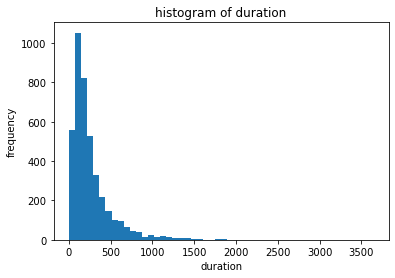

In [59]:
plt.hist(df['duration'],bins=50)
plt.xlabel("duration")
plt.ylabel("frequency")
plt.title("histogram of duration")
plt.show()

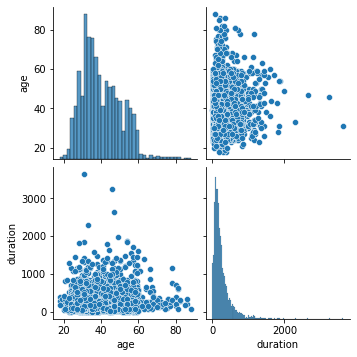

In [61]:
sns.pairplot(df[["age","duration"]])
plt.show()

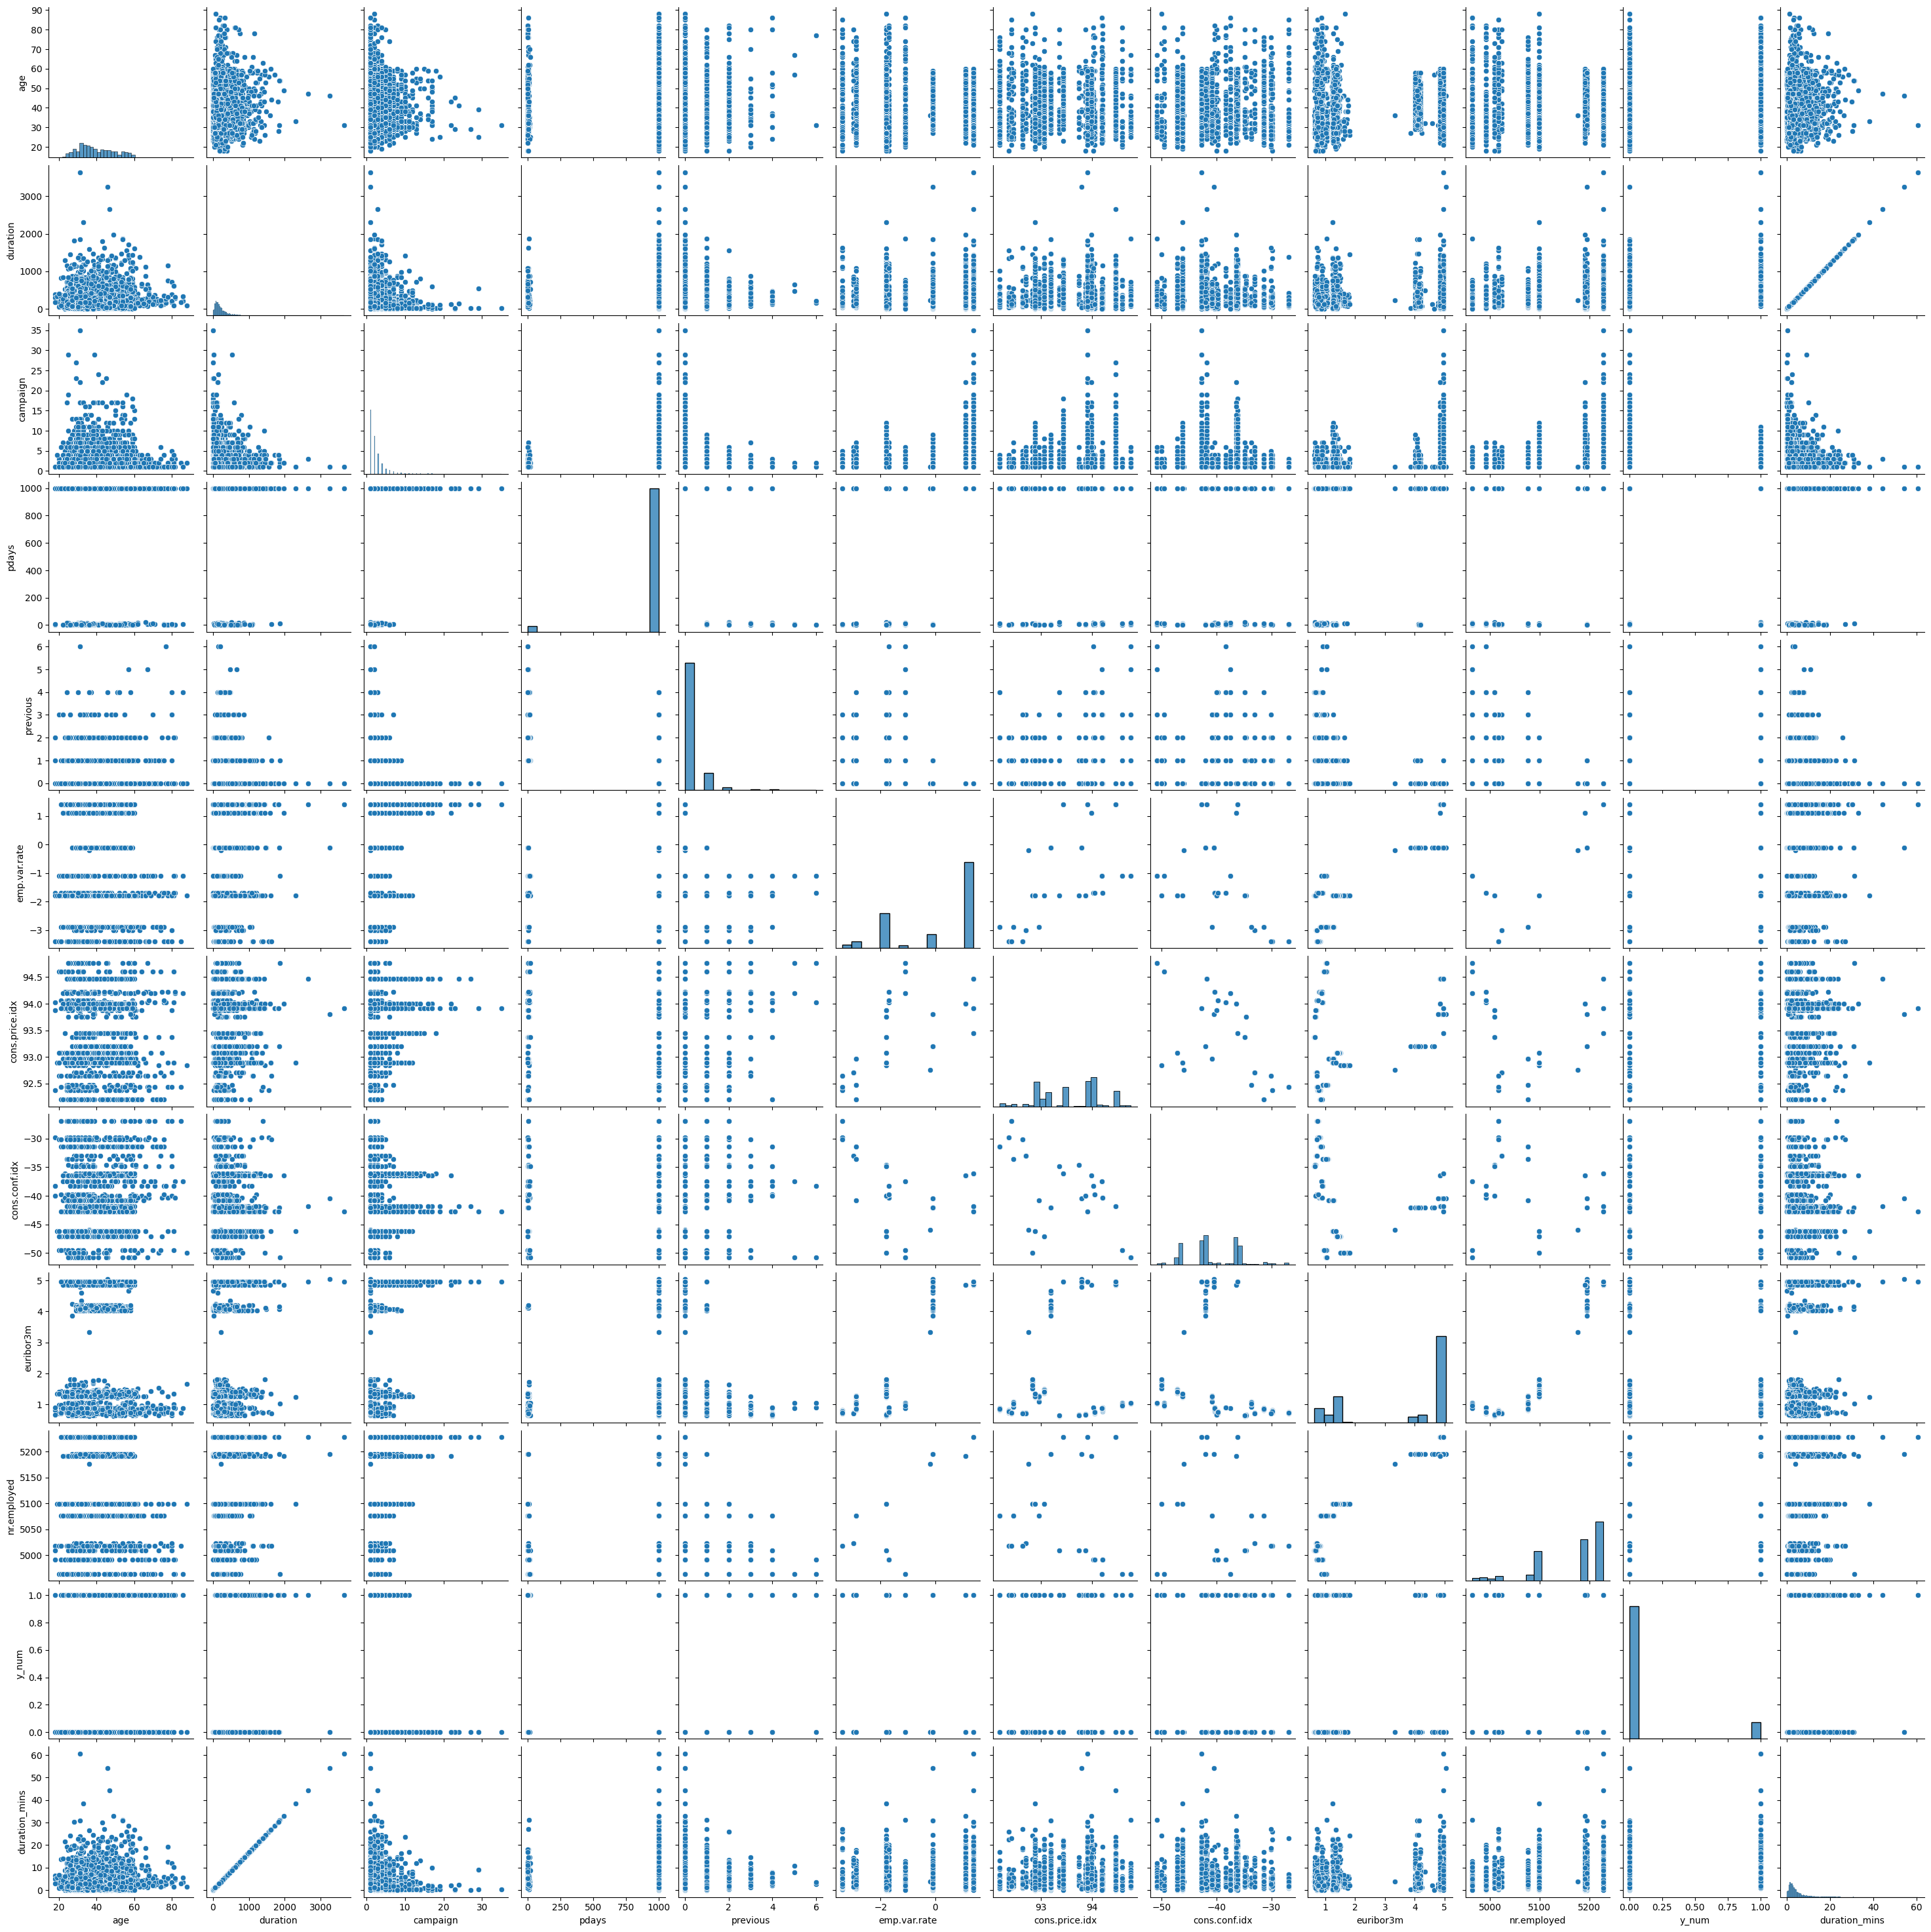

In [63]:
sns.pairplot(df)
plt.show()

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


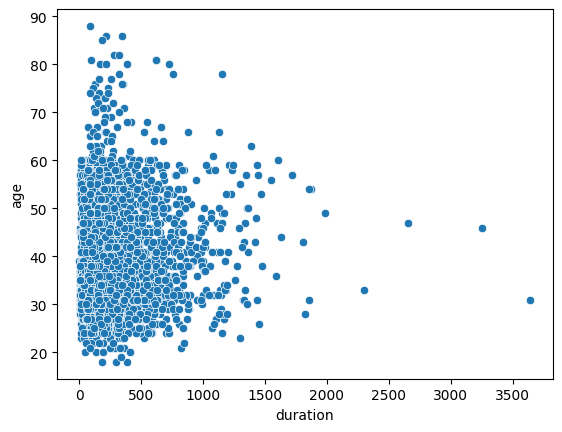

In [64]:
sns.scatterplot(df['duration'],df['age'])
plt.show()

In [89]:
# pd.plotting.scatter_matrix(
#     df[["age", "duration", "campaign"]],
#     figsize = (10, 10),
#     diagonal = "kde") #Kernel Density Estimation
# plt.show()

A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other. The plots on the main diagonal allow you to visually define the type of data distribution: the distribution is similar to normal for age, and for a call duration and the number of contacts, the geometric distribution is more suitable.

Now We will build a separate histogram for age feature:

The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

A visual analysis of the histograms presented allows us to make preliminary assumptions about the variability of the source data.

Now we will use Box Plot. It will allow us to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


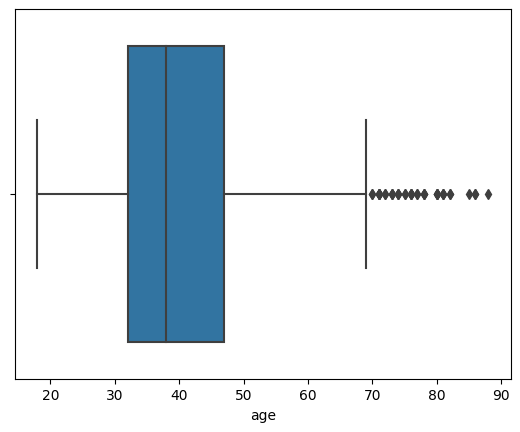

In [65]:
sns.boxplot(df['age'])
plt.show()

In [ ]:
#For different marital status, what is the median age?

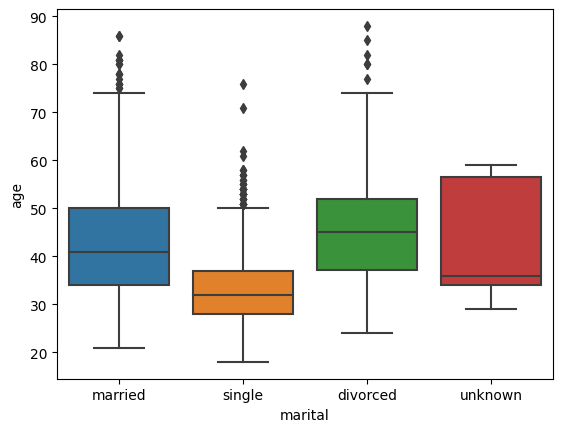

In [68]:
sns.boxplot(data = df, x= "marital",y="age")
plt.show()

In [69]:
grouped_df = df.groupby("marital").median()["age"].reset_index()
grouped_df

,marital,age
0,divorced,45
1,married,41
2,single,32
3,unknown,36


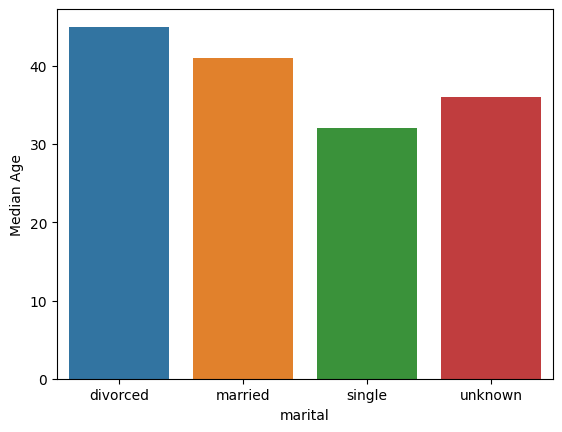

In [73]:
sns.barplot(data = grouped_df, x= "marital", y="age")
plt.ylabel("Median Age")
plt.show()

In [ ]:
#Older people get better interest rates compared to youngdr people

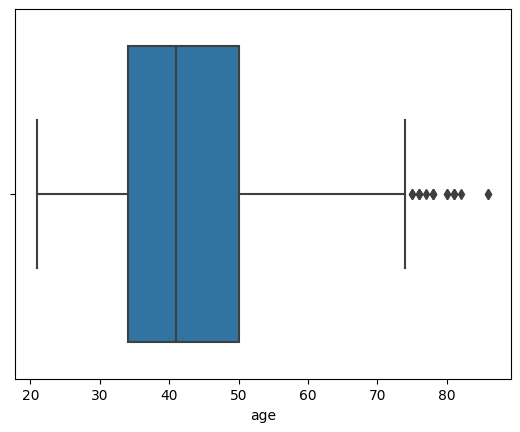

In [91]:
married_age = df[df['marital'] == 'married']['age']
sns.boxplot(married_age)
plt.show()

In [ ]:
#For each marital status, find out how many have purchased and have not purchased

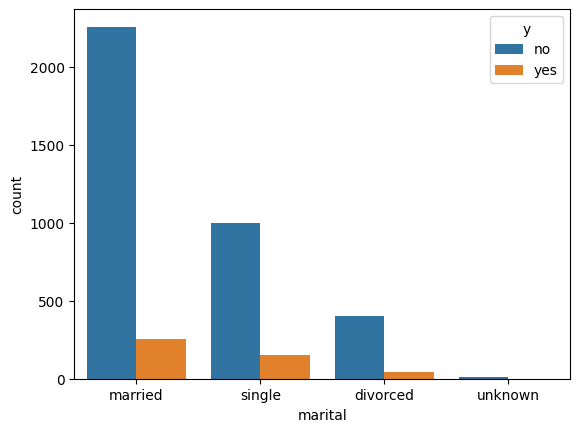

In [77]:
sns.countplot(data = df,x= "marital",hue = "y")
plt.show()

The plot shows that unmarried people are on average younger than divorced and married ones. For the last two groups, there is an outlier zone over 70 years old, and for unmarried - over 50.

# Now we will try to do this by data grouping on other features:

# Tasks
In this section, we will solve some tasks with the source bank dataset.

In [ ]:
for i in the length of rows:
    if age> 30 then
          set y as 0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,duration_mins
589,77,management,married,unknown,no,yes,no,cellular,aug,fri,160,1,3,6,success,-1.7,94.027,-38.3,0.905,4991.6,yes,1,2.666667
2122,31,admin.,single,university.degree,no,no,yes,cellular,nov,wed,212,2,3,6,success,-1.1,94.767,-50.8,1.048,4963.6,no,0,3.533333
2018,57,admin.,divorced,high.school,no,no,no,cellular,sep,tue,473,1,3,5,success,-1.1,94.199,-37.5,0.877,4963.6,yes,1,7.883333
448,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,655,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,yes,1,10.916667
3210,80,retired,married,basic.4y,no,no,no,cellular,mar,fri,213,3,6,4,success,-1.8,93.369,-34.8,0.649,5008.7,yes,1,3.550000
696,86,retired,married,unknown,unknown,yes,yes,cellular,sep,tue,211,1,7,4,success,-1.1,94.199,-37.5,0.877,4963.6,yes,1,3.516667
1793,36,management,divorced,university.degree,no,yes,no,cellular,jun,mon,422,1,3,4,success,-1.7,94.055,-39.8,0.720,4991.6,yes,1,7.033333
1660,37,technician,single,university.degree,no,yes,no,cellular,aug,tue,481,2,999,4,failure,-1.7,94.027,-38.3,0.899,4991.6,yes,1,8.016667
2862,58,management,married,university.degree,no,no,no,cellular,may,thu,289,1,3,4,success,-1.8,93.876,-40.0,0.683,5008.7,yes,1,4.816667
1298,36,management,married,university.degree,no,unknown,unknown,cellular,sep,wed,331,1,6,4,failure,-1.1,94.199,-37.5,0.876,4963.6,yes,1,5.516667


In [78]:
df.head() #previous --> previous number of contacts made

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,duration_mins
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,8.116667
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,5.766667
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,3.783333
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0.283333
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0.966667


# Question 1
List of 10 clients with the largest number of contacts.

In [80]:
df.sort_values(by = "previous",ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num,duration_mins
589,77,management,married,unknown,no,yes,no,cellular,aug,fri,160,1,3,6,success,-1.7,94.027,-38.3,0.905,4991.6,yes,1,2.666667
2122,31,admin.,single,university.degree,no,no,yes,cellular,nov,wed,212,2,3,6,success,-1.1,94.767,-50.8,1.048,4963.6,no,0,3.533333
2018,57,admin.,divorced,high.school,no,no,no,cellular,sep,tue,473,1,3,5,success,-1.1,94.199,-37.5,0.877,4963.6,yes,1,7.883333
448,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,655,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,yes,1,10.916667
3210,80,retired,married,basic.4y,no,no,no,cellular,mar,fri,213,3,6,4,success,-1.8,93.369,-34.8,0.649,5008.7,yes,1,3.550000
696,86,retired,married,unknown,unknown,yes,yes,cellular,sep,tue,211,1,7,4,success,-1.1,94.199,-37.5,0.877,4963.6,yes,1,3.516667
1793,36,management,divorced,university.degree,no,yes,no,cellular,jun,mon,422,1,3,4,success,-1.7,94.055,-39.8,0.720,4991.6,yes,1,7.033333
1660,37,technician,single,university.degree,no,yes,no,cellular,aug,tue,481,2,999,4,failure,-1.7,94.027,-38.3,0.899,4991.6,yes,1,8.016667
2862,58,management,married,university.degree,no,no,no,cellular,may,thu,289,1,3,4,success,-1.8,93.876,-40.0,0.683,5008.7,yes,1,4.816667
1298,36,management,married,university.degree,no,unknown,unknown,cellular,sep,wed,331,1,6,4,failure,-1.1,94.199,-37.5,0.876,4963.6,yes,1,5.516667


# Question 2
Determine the median age and the number of contacts for different levels of client education.

In [83]:
df.groupby("education").median()[["age","previous"]]

,age,previous
education,,
basic.4y,48.0,0.0
basic.6y,39.0,0.0
basic.9y,38.0,0.0
high.school,36.0,0.0
illiterate,42.0,0.0
professional.course,38.0,0.0
university.degree,36.0,0.0
unknown,41.0,0.0


In [87]:
median_age = df.groupby("education").median()["age"].reset_index()
median_age

,education,age
0,basic.4y,48.0
1,basic.6y,39.0
2,basic.9y,38.0
3,high.school,36.0
4,illiterate,42.0
5,professional.course,38.0
6,university.degree,36.0
7,unknown,41.0


In [88]:
previous = df.groupby("education").sum()["previous"].reset_index()
previous

,education,previous
0,basic.4y,61
1,basic.6y,32
2,basic.9y,91
3,high.school,190
4,illiterate,0
5,professional.course,104
6,university.degree,262
7,unknown,44


In [89]:
pd.merge(median_age,previous, on = "education", how = "inner")

,education,age,previous
0,basic.4y,48.0,61
1,basic.6y,39.0,32
2,basic.9y,38.0,91
3,high.school,36.0,190
4,illiterate,42.0,0
5,professional.course,38.0,104
6,university.degree,36.0,262
7,unknown,41.0,44


In [84]:
df.groupby("education").agg({"age":"median", "previous":"sum"})

,age,previous
education,,
basic.4y,48,61
basic.6y,39,32
basic.9y,38,91
high.school,36,190
illiterate,42,0
professional.course,38,104
university.degree,36,262
unknown,41,44


In [95]:
df.pivot_table(
    ["age", "previous"], #numerical
    ["education"], #groupby
    aggfunc = ["median", "sum"],
)

median             sum         
                       age previous    age previous
education                                          
basic.4y                48        0  20445       61
basic.6y                39        0   9153       32
basic.9y                38        0  22519       91
high.school             36        0  35088      190
illiterate              42        0     42        0
professional.course     38        0  21511      104
university.degree       36        0  49318      262
unknown                 41        0   7152       44

# Question 3
Output box plot to analyze the client age distribution by their education level.

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


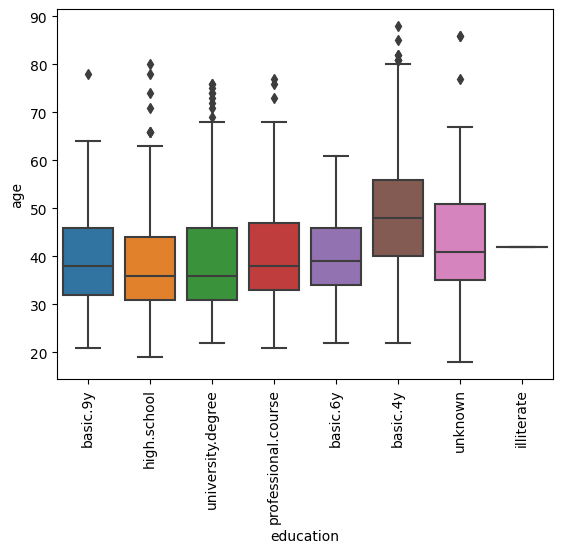

In [97]:
sns.boxplot(df['education'],df['age'])
plt.xticks(rotation = 90)
plt.show()